In [44]:
import PIL
import numpy as np
import matplotlib.pyplot as plt

(1024, 1536, 3)


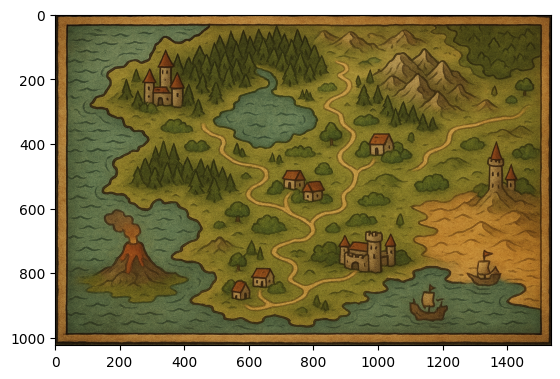

In [45]:
# load world map
WORLD_MAP_FILE = "data/world_map.png"

img = PIL.Image.open(WORLD_MAP_FILE)
plt.imshow(img)
np_img = np.array(img)
print(np_img.shape)

In [46]:
import torch

torch.randint(-1, 10, (10,))

tensor([ 3,  3,  5,  2,  8,  0,  0,  3, -1,  2])

3
Right


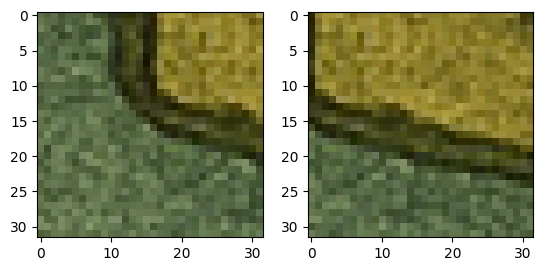

In [55]:
from dataset import WorldDataset

data = WorldDataset("data/world_map.png")

start, action, end = data[0]


print(action)

start = start.permute(1, 2, 0)
end = end.permute(1, 2, 0)

fig, (ax1, ax2) = plt.subplots(1, 2)

action_str = (
    "Up"
    if action == 0
    else "Down"
    if action == 1
    else "Left"
    if action == 2
    else "Right"
)

print(action_str)

ax1.imshow(start)
ax2.imshow(end)